<a href="https://colab.research.google.com/github/eltolo/machine-learning/blob/master/JT_ImageColorizerColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **<font color='blue'> Artistic Colorizer </font>**

#◢ DeOldify - Colorize your own photos!

####**Credits:**

Special thanks to:

Matt Robinson and María Benavente for pioneering the DeOldify image colab notebook.  

Dana Kelley for doing things, breaking stuff & having an opinion on everything.



---


#◢ Verify Correct Runtime Settings

**<font color='#FF000'> IMPORTANT </font>**

In the "Runtime" menu for the notebook window, select "Change runtime type." Ensure that the following are selected:
* Runtime Type = Python 3
* Hardware Accelerator = GPU 


#◢ Git clone and install DeOldify

In [1]:
!git clone https://github.com/jantic/DeOldify.git DeOldify 

Cloning into 'DeOldify'...
remote: Enumerating objects: 2594, done.
remote: Counting objects: 100% (248/248), done.
remote: Compressing objects: 100% (174/174), done.
remote: Total 2594 (delta 77), reused 207 (delta 67), pack-reused 2346
Receiving objects: 100% (2594/2594), 69.71 MiB | 15.92 MiB/s, done.
Resolving deltas: 100% (1158/1158), done.


In [2]:
cd DeOldify

/content/DeOldify


#◢ Setup

In [3]:
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

In [4]:
!pip install -r requirements-colab.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.4/631.4 KB 43.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.2/355.2 KB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 KB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.2/357.2 KB 37.4 MB/s eta 0:00:00
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654019 sha256=c1836b64

In [5]:
import fastai
from deoldify.visualize import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


NumExpr defaulting to 2 threads.


INFO:root:Generating grammar tables from /usr/lib/python3.8/lib2to3/Grammar.txt


Generating grammar tables from /usr/lib/python3.8/lib2to3/Grammar.txt


INFO:root:Generating grammar tables from /usr/lib/python3.8/lib2to3/PatternGrammar.txt


Generating grammar tables from /usr/lib/python3.8/lib2to3/PatternGrammar.txt


In [6]:
!mkdir 'models'
!wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth

mkdir: cannot create directory ‘models’: File exists
--2023-02-18 14:32:07--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 143.244.50.211, 2400:52e0:1a01::953:1
Connecting to data.deepai.org (data.deepai.org)|143.244.50.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  4.89MB/s    in 50s     

2023-02-18 14:32:57 (4.88 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]



In [7]:
colorizer = get_image_colorizer(artistic=True)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also u

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

#◢ Instructions

### source_url
Type in a url to a direct link of an image.  Usually that means they'll end in .png, .jpg, etc. NOTE: If you want to use your own image, upload it first to a site like Imgur. 

### render_factor
The default value of 35 has been carefully chosen and should work -ok- for most scenarios (but probably won't be the -best-). This determines resolution at which the color portion of the image is rendered. Lower resolution will render faster, and colors also tend to look more vibrant. Older and lower quality images in particular will generally benefit by lowering the render factor. Higher render factors are often better for higher quality images, but the colors may get slightly washed out. 

### watermarked
Selected by default, this places a watermark icon of a palette at the bottom left corner of the image.  This is intended to be a standard way to convey to others viewing the image that it is colorized by AI. We want to help promote this as a standard, especially as the technology continues to improve and the distinction between real and fake becomes harder to discern. This palette watermark practice was initiated and lead by the company MyHeritage in the MyHeritage In Color feature (which uses a newer version of DeOldify than what you're using here).

#### How to Download a Copy
Simply right click on the displayed image and click "Save image as..."!

## Pro Tips

You can evaluate how well the image is rendered at each render_factor by using the code at the bottom (that cell under "See how well render_factor values perform on a frame here"). 

#◢ Colorize!!

In [ ]:
source_url = '' #@param {type:"string"}
render_factor = 35  #@param {type: "slider", min: 7, max: 40}
watermarked = True #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

## See how well render_factor values perform on the image here

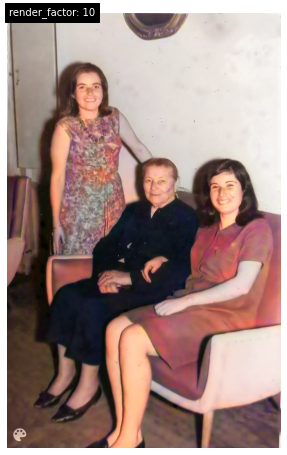

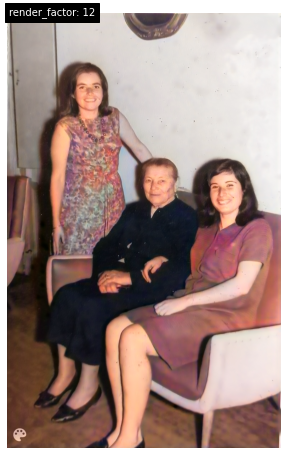

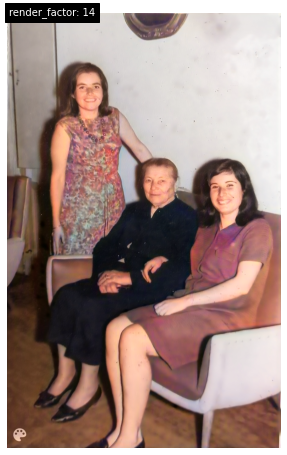

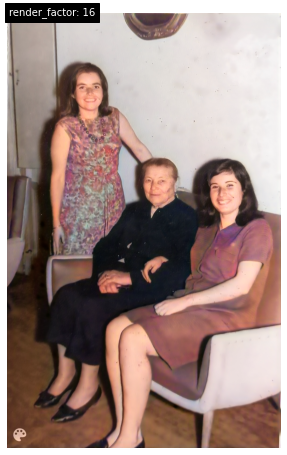

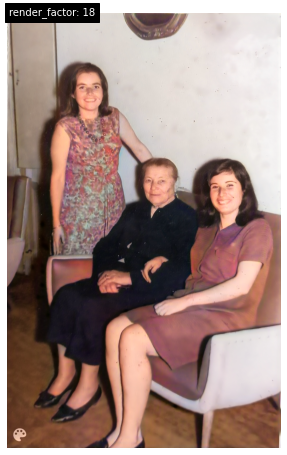

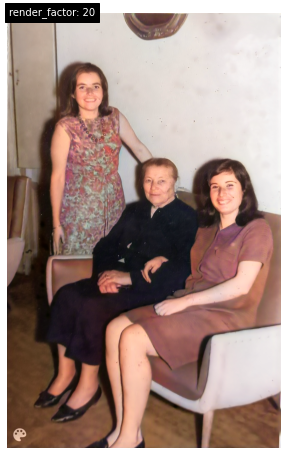

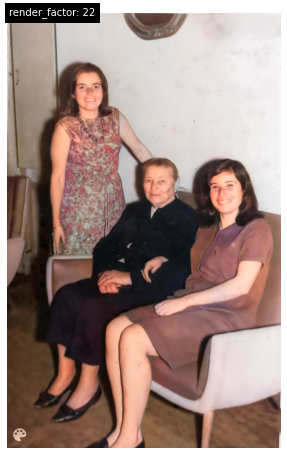

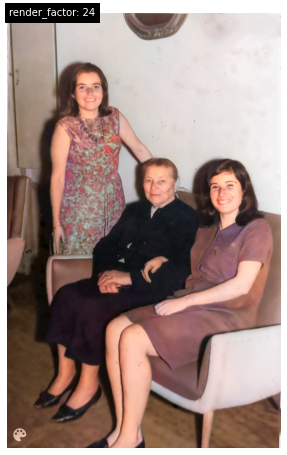

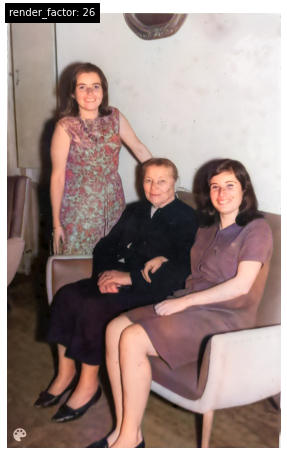

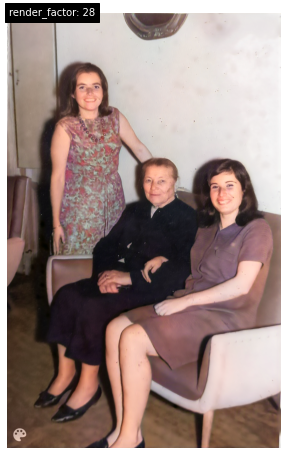

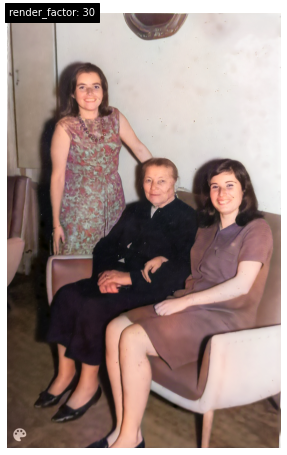

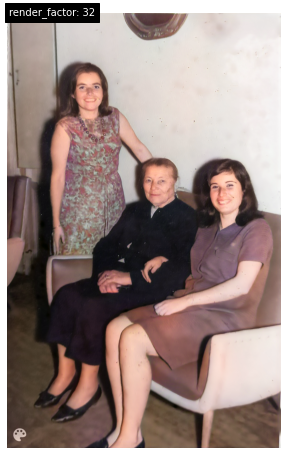

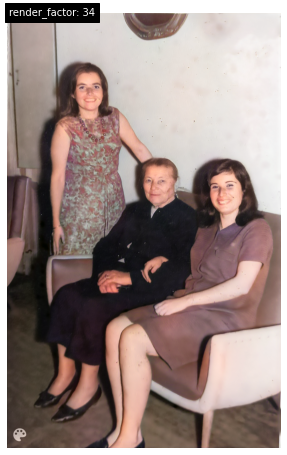

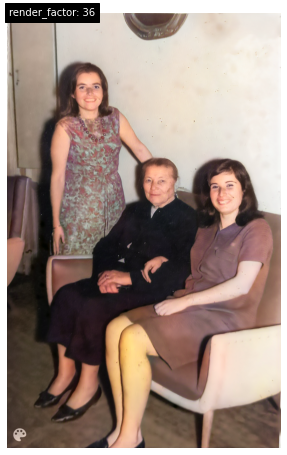

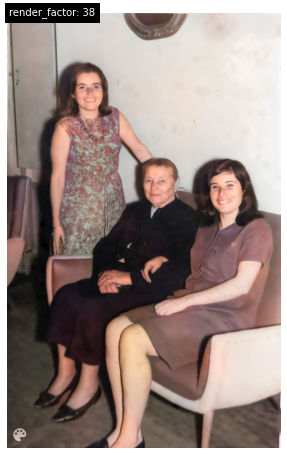

In [9]:
for i in range(10,40,2):
    colorizer.plot_transformed_image('test_images/20221121_123111.png', render_factor=i, display_render_factor=True, figsize=(8,8))

In [10]:
!ls

ColorFIDBenchmarkArtistic.ipynb		LICENSE
ColorizeTrainingArtistic.ipynb		MANIFEST.in
ColorizeTrainingStable.ipynb		models
ColorizeTrainingStableLargeBatch.ipynb	README.md
ColorizeTrainingVideo.ipynb		requirements-colab.txt
ColorizeTrainingWandb.ipynb		requirements-dev.txt
deoldify				requirements.txt
environment.yml				resource_images
fastai					result_images
fid					setup.py
ImageColorizerArtisticTests.ipynb	test_images
ImageColorizerColab.ipynb		tox.ini
ImageColorizerColabStable.ipynb		VideoColorizerColab.ipynb
ImageColorizer.ipynb			VideoColorizer.ipynb
ImageColorizerStableTests.ipynb


In [12]:
input_folder = "test_images"
output_folder = "result_images"

import os
basepath = os.getcwd()
input_path = os.path.join(basepath, input_folder)
output_path = os.path.join(basepath, output_folder)
#os.mkdir(output_path)

In [40]:
from google.colab import files
import shutil

upload_path = os.path.join(basepath, "test_images", "upload")
upload_output_path = os.path.join(basepath, "upload_output")

if os.path.isdir(upload_output_path):
    shutil.rmtree(upload_output_path)

if os.path.isdir(upload_path):
    shutil.rmtree(upload_path)

os.mkdir(upload_output_path)
os.mkdir(upload_path)

#uploaded = files.upload()
#for filename in uploaded.keys():
#    shutil.move(os.path.join(basepath, filename), os.path.join(upload_path, filename))

/content/DeOldify/test_images/upload


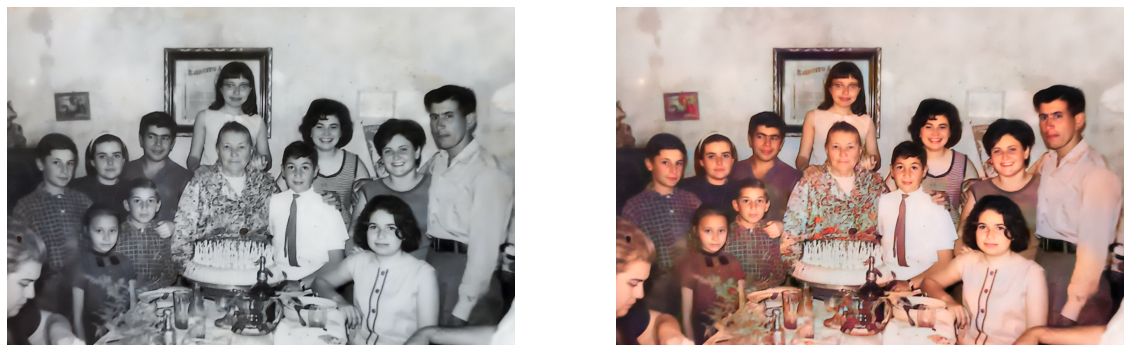

In [46]:
print(upload_path )
render_factor = 21  #@param {type: "slider", min: 7, max: 40}
watermarked = False #@param {type:"boolean"} 
filename = "test.png"
image_path = colorizer.plot_transformed_image(path=upload_path+"/" + filename, render_factor=32, compare=True, watermarked=watermarked)
#show_image_in_notebook(image_path)

In [55]:
print(upload_path, filename)
print("--------------")
shutil.move(os.path.join(upload_path, filename), os.path.join(upload_path, filename))

/content/DeOldify/test_images/upload .ipynb_checkpoints
--------------tt


In [57]:
!pwd
!ls

/content/DeOldify
ColorFIDBenchmarkArtistic.ipynb		LICENSE
ColorizeTrainingArtistic.ipynb		MANIFEST.in
ColorizeTrainingStable.ipynb		models
ColorizeTrainingStableLargeBatch.ipynb	README.md
ColorizeTrainingVideo.ipynb		requirements-colab.txt
ColorizeTrainingWandb.ipynb		requirements-dev.txt
deoldify				requirements.txt
environment.yml				resource_images
fastai					result_images
fid					setup.py
ImageColorizerArtisticTests.ipynb	test_images
ImageColorizerColab.ipynb		tox.ini
ImageColorizerColabStable.ipynb		upload_output
ImageColorizer.ipynb			VideoColorizerColab.ipynb
ImageColorizerStableTests.ipynb		VideoColorizer.ipynb


/content/DeOldify/test_images/upload/
--------------
20221121_123203(0).png
test.png


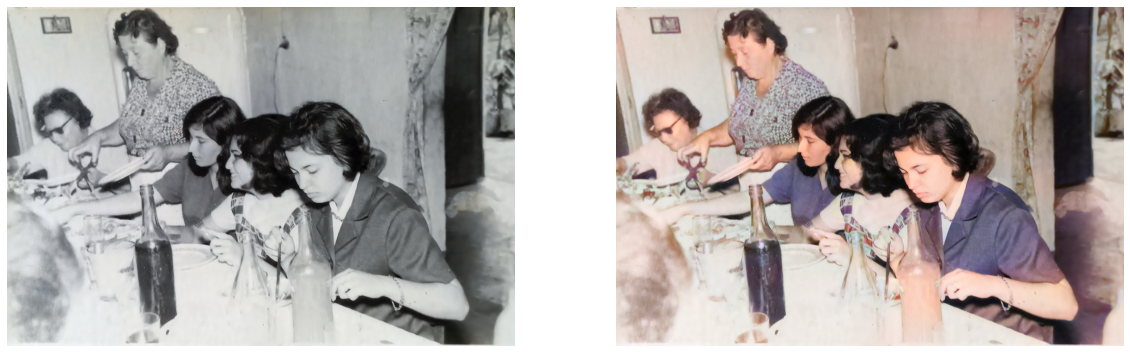

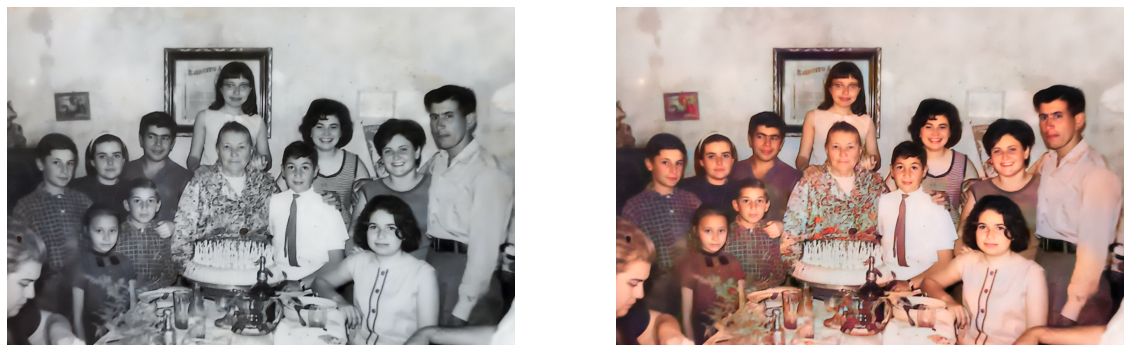

In [62]:
input_path = upload_path+"/"
print(input_path)
print("--------------")

filenames = os.listdir(os.path.join(input_path))
filenames.sort()

for filename in filenames[1:len(filenames)]:
    print(filename)
    #image_original = PIL.Image.open(os.path.join(input_path, filename))
    #image_restore = PIL.Image.open(os.path.join(output_path, 'final_output', filename))

    #display(make_grid(image_original, image_restore))
    image_path = colorizer.plot_transformed_image(path=input_path + filename, render_factor=32, compare=True, watermarked=watermarked)

In [16]:
help(colorizer)

Help on ModelImageVisualizer in module deoldify.visualize object:

class ModelImageVisualizer(builtins.object)
 |  ModelImageVisualizer(filter: deoldify.filters.IFilter, results_dir: str = None)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, filter: deoldify.filters.IFilter, results_dir: str = None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get_transformed_image(self, path: pathlib.Path, render_factor: int = None, post_process: bool = True, watermarked: bool = True) -> <module 'PIL.Image' from '/usr/local/lib/python3.8/dist-packages/PIL/Image.py'>
 |  
 |  plot_transformed_image(self, path: str, results_dir: pathlib.Path = None, figsize: Tuple[int, int] = (20, 20), render_factor: int = None, display_render_factor: bool = False, compare: bool = False, post_process: bool = True, watermarked: bool = True) -> pathlib.Path
 |  
 |  plot_transformed_image_from_url(self, url: str, path: str = 'test_images/image.png', results_dir: pathlib.Path = No

In [ ]:
shutil.move()

---
#⚙ Recommended image sources 
* [/r/TheWayWeWere](https://www.reddit.com/r/TheWayWeWere/)